# Minnesota Crime Data
----
- Crime data by police dept for each year: 2012-2014
- Crime data by neighborhood in Mpls for years 2017-2019

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Mpls neighborhood crime data
mpls_crime = pd.read_csv("Resources/Minneapolis_NEIGHBORHOOD_CRIME_STATS.csv")

# MN crime data by jurisdiction (2014, 2013, 2012)
mn_crime_2014 = pd.read_csv("Resources/MN_crime_data_2014.csv", header=8, skipfooter=19, engine='python')
mn_crime_2013 = pd.read_csv("Resources/MN_crime_data_2013.csv", header=8, skipfooter=19, engine='python')
mn_crime_2012 = pd.read_csv("Resources/MN_crime_data_2012.csv", header=8, skipfooter=19, engine='python')

### Pairing down the data for crime by police dept in mn for each year

In [3]:
# Scale down number of columns
columns_of_interest = \
['Agency',
 'Population',
 'Real Violent Crime Total',
 'Real Violent Crime Rate',
 'Property crime total',
 'Property crime rate',
 'Crime Total',
 'Crime Rate']

new_column_names = \
[
    'Agency',
    'Population',
    'VC_Total',
    'VC_Rate',
    'PC_Total',
    'PC_Rate',
    'Crime_Total',
    'Crime_Rate'    
]

In [4]:
# Crime data for 2014

# get violent crime total, then violent crime rate
mn_crime_2014['Real Violent Crime Total'] = mn_crime_2014['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2014['Revised rape /2'] + \
                                            mn_crime_2014['Robbery'] + \
                                            mn_crime_2014['Aggravated assault']

mn_crime_2014['Real Violent Crime Rate'] = mn_crime_2014['Real Violent Crime Total'] / \
                                           (mn_crime_2014['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2014['Crime Total'] = mn_crime_2014['Property crime total'] + \
                                   mn_crime_2014['Real Violent Crime Total']

mn_crime_2014['Crime Rate'] = mn_crime_2014['Crime Total'] / \
                              (mn_crime_2014['Population'] / 100000)

crime_rates_2014 = mn_crime_2014[columns_of_interest]

# Rename columns
crime_rates_2014.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2014.to_csv("Resources/2014_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [5]:
# DO THE SAME FOR 2013

# get violent crime total, then violent crime rate
mn_crime_2013['Real Violent Crime Total'] = mn_crime_2013['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2013['Revised rape /2'] + \
                                            mn_crime_2013['Robbery'] + \
                                            mn_crime_2013['Aggravated assault']

mn_crime_2013['Real Violent Crime Rate'] = mn_crime_2013['Real Violent Crime Total'] / \
                                           (mn_crime_2013['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2013['Crime Total'] = mn_crime_2013['Property crime total'] + \
                                   mn_crime_2013['Real Violent Crime Total']

mn_crime_2013['Crime Rate'] = mn_crime_2013['Crime Total'] / \
                              (mn_crime_2013['Population'] / 100000)

crime_rates_2013 = mn_crime_2013[columns_of_interest]

# Rename columns
crime_rates_2013.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2013.to_csv("Resources/2013_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [6]:
# DO THE SAME FOR 2012

# get violent crime total, then violent crime rate
mn_crime_2012['Real Violent Crime Total'] = mn_crime_2012['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2012['Revised rape /2'] + \
                                            mn_crime_2012['Robbery'] + \
                                            mn_crime_2012['Aggravated assault']

mn_crime_2012['Real Violent Crime Rate'] = mn_crime_2012['Real Violent Crime Total'] / \
                                           (mn_crime_2012['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2012['Crime Total'] = mn_crime_2012['Property crime total'] + \
                                   mn_crime_2012['Real Violent Crime Total']

mn_crime_2012['Crime Rate'] = mn_crime_2012['Crime Total'] / \
                              (mn_crime_2012['Population'] / 100000)

crime_rates_2012 = mn_crime_2012[columns_of_interest]

# Rename columns
crime_rates_2012.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
#crime_rates_2012.to_csv("Resources/2012_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [7]:
# Drop rows with NaN values
## Each county's sherrif's office gets dropped
### It's okay because the city police depts are more relevant

crime_rates_2014.dropna(how='any', inplace=True)
crime_rates_2013.dropna(how='any', inplace=True)

# 2012 data doesn't contain violent crime data
crime_rates_2012 = crime_rates_2012.loc[crime_rates_2012['Agency'].str.contains('Sheriff') == False]

C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# Create dataframe storing avg crime rates, populations for each department

avg_crime_rates = crime_rates_2014.filter(['Agency'], axis=1)

avg_columns = ['Avg_Population', 'Avg_VC', 'Avg_PC', 'Avg_Crime_Rate']

crime_rates_columns = ['Population', 'VC_Rate', 'PC_Rate', 'Crime_Rate']

# tracking index to iterate through avg_columns
index=0

# calculate average crime rates between 2013 and 2014
for column in crime_rates_columns:
    
    avg_crime_rates[avg_columns[index]] = (crime_rates_2014[column] + crime_rates_2013[column]) / 2
    
    index += 1
    
# reset the index    
avg_crime_rates.reset_index(drop=True, inplace=True)


In [9]:
# Remove extraneous substrings from 'Agency' names

agency_list = []
substrings = [' Police Dept', 'City Of ', ' Safety Dept',
              ' Dept Public Safety', ' City', ' Dept Of Public Safety']

# iterate through and remove each substring defined above ^^
for name in avg_crime_rates.Agency:

    for sub in substrings:
        
        if sub in name:
            
            name = str.replace(name, sub, '')
        
    agency_list.append(name)

# update agency column
avg_crime_rates.Agency = agency_list

# Output as CSV for later reference
#avg_crime_rates.to_csv("Resources/2013-2014_MN_Crime_OUTPUT_FILE.csv", index=False)

### Add in school data

In [10]:
# Read in school data
school_data = pd.read_excel("Resources/CleanedGradFile2018.xlsx")

# Drop extra index row
school_data.drop(['Unnamed: 0'], axis=1, inplace=True)

school_data

,District Number,School Number,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,1,1,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.80,87.0,306 2nd St NW,Aitkin,MN,56431
1,1,307,BASIC SKILLS-4,All Students,Graduate,77.36,106.0,1250 W Broadway Ave,Minneapolis,MN,55411
2,1,346,800 W BROADWAY,All Students,Graduate,3.57,28.0,1250 West Broadway,Minneapolis,MN,55411
3,1,347,FAIR SENIOR HIGH,All Students,Graduate,79.37,63.0,10 South 10th Street,Minneapolis,MN,55403
4,1,348,MERC,All Students,Graduate,3.70,27.0,2539 Pleasant Ave,Minneapolis,MN,55404-4213
5,1,349,LORING-NICOLLET HIGH,All Students,Graduate,37.50,24.0,1925 Nicollet Ave S,Minneapolis,MN,55403
6,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
7,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
8,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
9,1,353,LONGFELLOW ALTERNATIVE,All Students,Graduate,12.90,31.0,3017 E 31st St,Minneapolis,MN,55406


In [130]:
# create copy of avg crime rates to work with (easier name to handle as well)
crime_rates_df = avg_crime_rates.copy()

# rename columns
crime_rates_df_columns = \
[
    'City',
    'Population',
    'Violent Crime Rate',
    'Property Crime Rate',
    'Overall Crime Rate'
]

crime_rates_df.columns = crime_df_columns


#crime_rates_df = crime_df[['City', 'Violent Crime Rate', 'Property Crime Rate', 'Overall Crime Rate']]

In [131]:
# merge crime rates with school data
school_crime = pd.merge(crime_rates_df, school_data,
                       how='left', left_on='City', right_on='Physical City')

# drop rows with na and drop duplicates
school_crime.dropna(how='any', inplace=True)

school_crime.drop_duplicates(inplace=True)

# remove schools within schools
school_crime = school_crime.copy().loc[school_crime['School Name'].str.contains(' - SWS') == False]

# Show number of schools included
school_crime.City.count()

254

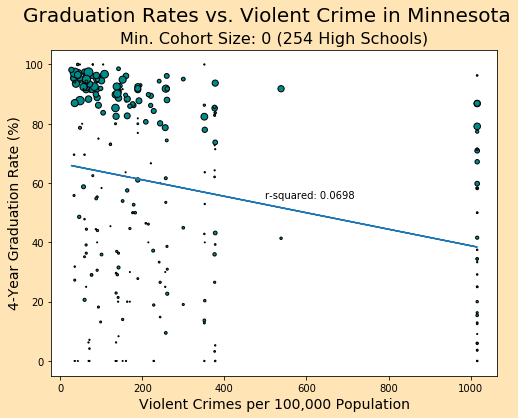

In [148]:
# Set minimum cohort size to be included
min_cohort = 0

# limit by min cohort size
school_crime = school_crime.copy().loc[school_crime['Four Year Total'] >= min_cohort]

violent_crime = school_crime['Violent Crime Rate']
grad_rates = school_crime['Four Year Percent']


# create scatter plot for grad rate vs. violent crime rate
# scale marker size by cohort size
fig, ax = plt.subplots(figsize = (8,6), facecolor="moccasin")

plt.scatter(violent_crime,
           grad_rates,
           s=school_crime['Four Year Total']/10,
           color='darkcyan',
           edgecolors='black')

# get linear regression curve
line = linregress(school_crime['Violent Crime Rate'],
           school_crime['Four Year Percent'])

linear_fit = line.slope * violent_crime + line.intercept

plt.plot(violent_crime, linear_fit)

# label axes
ax.set_xlabel("Violent Crimes per 100,000 Population", fontsize=14)
ax.set_ylabel("4-Year Graduation Rate (%)", fontsize=14)

# give title; also subtitle including min cohort setting and number of schools included
plt.suptitle(f'Graduation Rates vs. Violent Crime in Minnesota', fontsize=20)
plt.title(f'Min. Cohort Size: {min_cohort} ({school_crime.City.count()} High Schools)', fontsize=16)

plt.annotate(f"r-squared: {round(line.rvalue **2, 4)}", (500, 55), color='black')

plt.savefig("Resources/Output_Images/MN_Grad_Rates_vs_Violent_Crime_Cohort-0.png")
plt.show()

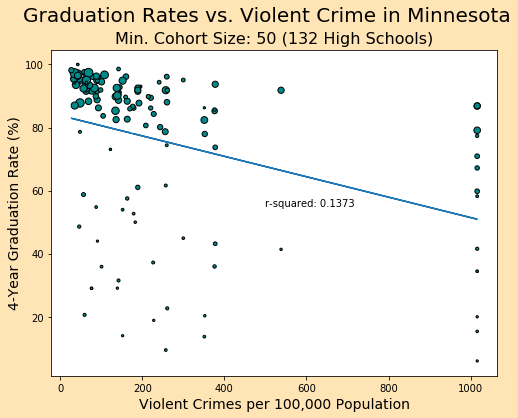

In [149]:
# Set minimum cohort size to be included
min_cohort = 50

# limit by min cohort size
school_crime = school_crime.copy().loc[school_crime['Four Year Total'] >= min_cohort]

violent_crime = school_crime['Violent Crime Rate']
grad_rates = school_crime['Four Year Percent']


# create scatter plot for grad rate vs. violent crime rate
# scale marker size by cohort size
fig, ax = plt.subplots(figsize = (8,6), facecolor="moccasin")

plt.scatter(violent_crime,
           grad_rates,
           s=school_crime['Four Year Total']/10,
           color='darkcyan',
           edgecolors='black')

# get linear regression curve
line = linregress(school_crime['Violent Crime Rate'],
           school_crime['Four Year Percent'])

linear_fit = line.slope * violent_crime + line.intercept

plt.plot(violent_crime, linear_fit)

# label axes
ax.set_xlabel("Violent Crimes per 100,000 Population", fontsize=14)
ax.set_ylabel("4-Year Graduation Rate (%)", fontsize=14)

# give title; also subtitle including min cohort setting and number of schools included
plt.suptitle(f'Graduation Rates vs. Violent Crime in Minnesota', fontsize=20)
plt.title(f'Min. Cohort Size: {min_cohort} ({school_crime.City.count()} High Schools)', fontsize=16)

plt.annotate(f"r-squared: {round(line.rvalue **2, 4)}", (500, 55), color='black')

plt.savefig("Resources/Output_Images/MN_Grad_Rates_vs_Violent_Crime_Cohort-50.png")
plt.show()

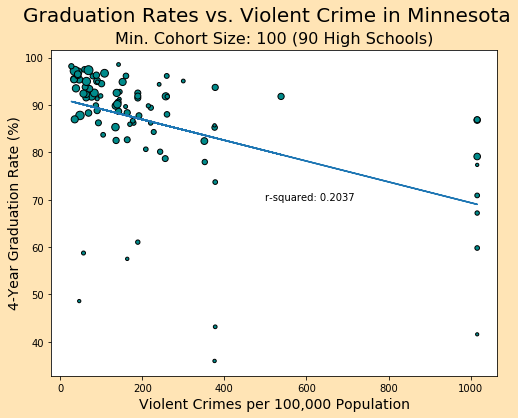

In [151]:
# Set minimum cohort size to be included
min_cohort = 100

# limit by min cohort size
school_crime = school_crime.copy().loc[school_crime['Four Year Total'] >= min_cohort]

violent_crime = school_crime['Violent Crime Rate']
grad_rates = school_crime['Four Year Percent']


# create scatter plot for grad rate vs. violent crime rate
# scale marker size by cohort size
fig, ax = plt.subplots(figsize = (8,6), facecolor="moccasin")

plt.scatter(violent_crime,
           grad_rates,
           s=school_crime['Four Year Total']/10,
           color='darkcyan',
           edgecolors='black')

# get linear regression curve
line = linregress(school_crime['Violent Crime Rate'],
           school_crime['Four Year Percent'])

linear_fit = line.slope * violent_crime + line.intercept

plt.plot(violent_crime, linear_fit)

# label axes
ax.set_xlabel("Violent Crimes per 100,000 Population", fontsize=14)
ax.set_ylabel("4-Year Graduation Rate (%)", fontsize=14)

# give title; also subtitle including min cohort setting and number of schools included
plt.suptitle(f'Graduation Rates vs. Violent Crime in Minnesota', fontsize=20)
plt.title(f'Min. Cohort Size: {min_cohort} ({school_crime.City.count()} High Schools)', fontsize=16)

plt.annotate(f"r-squared: {round(line.rvalue **2, 4)}", (500, 70), color='black')

plt.savefig("Resources/Output_Images/MN_Grad_Rates_vs_Violent_Crime_Cohort-100.png")
plt.show()

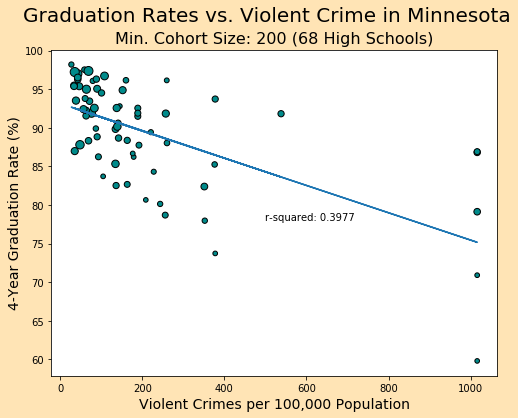

In [156]:
# Set minimum cohort size to be included
min_cohort = 200

# limit by min cohort size
school_crime = school_crime.copy().loc[school_crime['Four Year Total'] >= min_cohort]

violent_crime = school_crime['Violent Crime Rate']
grad_rates = school_crime['Four Year Percent']


# create scatter plot for grad rate vs. violent crime rate
# scale marker size by cohort size
fig, ax = plt.subplots(figsize = (8,6), facecolor="moccasin")

plt.scatter(violent_crime,
           grad_rates,
           s=school_crime['Four Year Total']/10,
           color='darkcyan',
           edgecolors='black')

# get linear regression curve
line = linregress(school_crime['Violent Crime Rate'],
           school_crime['Four Year Percent'])

linear_fit = line.slope * violent_crime + line.intercept

plt.plot(violent_crime, linear_fit)

# label axes
ax.set_xlabel("Violent Crimes per 100,000 Population", fontsize=14)
ax.set_ylabel("4-Year Graduation Rate (%)", fontsize=14)

# give title; also subtitle including min cohort setting and number of schools included
plt.suptitle(f'Graduation Rates vs. Violent Crime in Minnesota', fontsize=20)
plt.title(f'Min. Cohort Size: {min_cohort} ({school_crime.City.count()} High Schools)', fontsize=16)

plt.annotate(f"r-squared: {round(line.rvalue **2, 4)}", (500, 78), color='black')

plt.savefig("Resources/Output_Images/MN_Grad_Rates_vs_Violent_Crime_Cohort-200.png")
plt.show()

Text(0.5, 1.0, 'Min. Cohort Size: 0 (68 High Schools)')

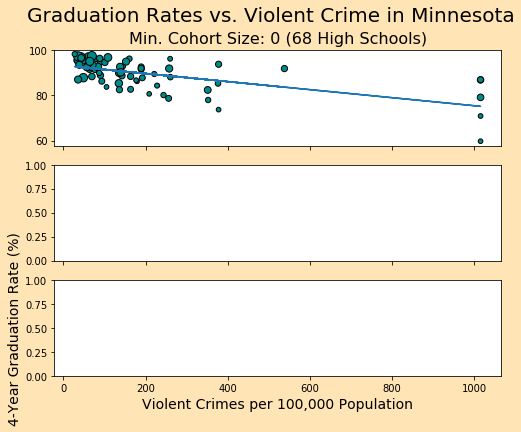

In [126]:
# SET MIN COHORT SIZE to 0
min_cohort = 0

# limit by min cohort size
school_crime = school_crime.copy().loc[school_crime['Four Year Total'] >= min_cohort]

violent_crime = school_crime['Violent Crime Rate']
grad_rates = school_crime['Four Year Percent']


# create scatter plot for grad rate vs. violent crime rate
# scale marker size by cohort size
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize = (8,6), facecolor="moccasin")

ax1.scatter(violent_crime,
           grad_rates,
           s=school_crime['Four Year Total']/10,
           color='darkcyan',
           edgecolors='black')

# get linear regression curve
line = linregress(school_crime['Violent Crime Rate'],
           school_crime['Four Year Percent'])

linear_fit = line.slope * violent_crime + line.intercept

ax1.plot(violent_crime, linear_fit)

# label axes
ax3.set_xlabel("Violent Crimes per 100,000 Population", fontsize=14)
plt.ylabel("4-Year Graduation Rate (%)", fontsize=14)

# give title; also subtitle including min cohort setting and number of schools included
plt.suptitle(f'Graduation Rates vs. Violent Crime in Minnesota', fontsize=20)
ax1.set_title(f'Min. Cohort Size: {min_cohort} ({school_crime.City.count()} High Schools)', fontsize=16)